### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [491]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

#### Problems

Use the prompts below to get started with your data analysis.  


###### 1. Read in the `coupons.csv` file.

In [418]:
data = pd.read_csv('data/coupons.csv')

In [419]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


###### 2. Investigate the dataset for missing or problematic data.

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

##### 2.1 Random sample to investigate data fields

In [421]:
data.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4253,Home,Alone,Sunny,80,10PM,Bar,1d,Male,21,Single,...,4~8,1~3,4~8,1~3,1,1,0,1,0,0
9998,Home,Alone,Sunny,30,6PM,Restaurant(20-50),1d,Female,36,Divorced,...,less1,1~3,less1,never,1,0,0,1,0,0
10842,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,21,Single,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
10664,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,26,Married partner,...,never,1~3,less1,never,1,1,0,0,1,0
7218,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Male,36,Unmarried partner,...,never,1~3,less1,never,1,1,0,0,1,0
505,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
12322,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Female,36,Married partner,...,never,1~3,less1,less1,1,0,0,1,0,0
9067,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,26,Married partner,...,1~3,4~8,4~8,less1,1,1,0,0,1,1
11750,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,gt8,4~8,4~8,less1,1,1,1,0,1,1
10374,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,26,Unmarried partner,...,less1,1~3,4~8,1~3,1,1,0,0,1,0


###### 2.2  Replace abbreviations with common symbols: "never" to "0", "less1" to "<1", "gt8" to ">8", "1\~3" and "4\~8" to "1-3" and "4-8"

In [576]:
data2=data.replace({"never":"0", "less1":"<1", "gt8":">8", "1~3":"1-3","4~8":"4-8"})
data2.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8533,Home,Alone,Sunny,80,6PM,Bar,2h,Female,21,Married partner,...,1-3,4-8,4-8,0,1,0,0,1,0,0
4123,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Male,31,Married partner,...,0,1-3,1-3,0,1,0,0,1,0,0
3208,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,41,Married partner,...,<1,<1,1-3,1-3,1,1,0,0,1,0
762,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,50plus,Married partner,...,1-3,4-8,4-8,1-3,1,0,0,1,0,1
3267,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Married partner,...,<1,1-3,<1,<1,1,1,1,0,1,0
8115,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Female,41,Married partner,...,<1,<1,<1,<1,1,1,0,1,0,1
10452,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Female,36,Divorced,...,>8,4-8,4-8,<1,1,0,0,0,1,1
11619,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,41,Married partner,...,<1,1-3,1-3,<1,1,0,0,0,1,1
9539,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Female,below21,Unmarried partner,...,1-3,<1,1-3,<1,1,0,0,0,1,1
6867,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,1d,Female,50plus,Single,...,4-8,1-3,1-3,0,1,0,0,0,1,1


###### 3. Decide what to do about your missing data -- drop, replace, other...

###### 3.1 Check for NaN data

In [423]:
data2.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

###### 3.2 Pull out columns with NaN data and sample to understand context

In [424]:
data2[['car', 'Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']].sample(20)

,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
12225,NaN,<1,1-3,1-3,1-3,<1
156,NaN,>8,>8,>8,>8,>8
4241,NaN,1-3,4-8,1-3,4-8,1-3
7521,NaN,0,1-3,1-3,4-8,<1
10610,NaN,<1,<1,4-8,>8,>8
10113,NaN,1-3,4-8,4-8,4-8,1-3
8293,Car that is too old to install Onstar :D,0,<1,1-3,<1,<1
7089,NaN,4-8,<1,>8,4-8,<1
7516,NaN,0,1-3,1-3,4-8,<1
12021,NaN,1-3,<1,<1,<1,<1


###### 3.3 Drop "car" column, data is sporatic and not informative

In [425]:
data3 = data2.drop(columns=['car'])
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

###### 3.4 Replace NaN with "-" in columns with usable data

In [426]:
data4=data3.replace(np.nan, "-")
data4.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3657,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,31,Married partner,...,1-3,1-3,1-3,<1,1,1,0,0,1,1
8563,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,21,Married partner,...,1-3,1-3,1-3,1-3,1,1,0,0,1,0
8100,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,50plus,Married partner,...,0,4-8,1-3,<1,1,1,1,0,1,1
3920,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Female,26,Single,...,0,1-3,<1,<1,1,0,0,0,1,0
1796,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,36,Unmarried partner,...,<1,4-8,1-3,<1,1,1,0,0,1,0
7465,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,31,Unmarried partner,...,0,<1,<1,0,1,0,0,0,1,1
6253,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,41,Divorced,...,4-8,1-3,1-3,<1,1,1,0,0,1,0
6588,No Urgent Place,Friend(s),Rainy,55,6PM,Restaurant(<20),2h,Male,36,Married partner,...,-,<1,<1,0,1,0,0,0,1,1
7784,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Male,26,Single,...,>8,>8,>8,>8,1,0,0,0,1,1
7191,Work,Alone,Rainy,55,7AM,Restaurant(20-50),1d,Male,46,Single,...,>8,1-3,4-8,<1,1,1,1,0,1,0


###### 4. What proportion of the total observations chose to accept the coupon? 



To determine the proportion that used the coupon, the sum of column 'Y' is divided by the count of column 'Y'. In column Y, 1 represents those using the coupon and 0 represents those that did not.

In [427]:
Used_Coupon=data4['Y'].sum()
Total_observed=data4['Y'].count()
Proportion = Used_Coupon/Total_observed
print(Proportion)

0.5684326710816777


###### The proportion is 0.57 or 57% accepting the coupon.

###### 5. Use a bar plot to visualize the `coupon` column.

Split coupons by type and visualize if they were accepted(Y=1) or not accepted (Y=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

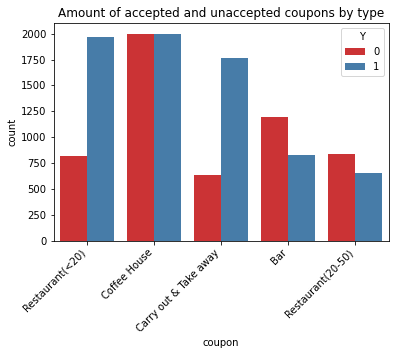

In [428]:
sns.countplot(data=data4, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted coupons by type')
plt.xticks(rotation=45, horizontalalignment='right')

###### 6. Use a histogram to visualize the temperature column.

###### 6.1 Sort data by temperature and take a random sample to understand temperature range. 

Temperature falls into 3 bins - 30, 55 and 80 degrees

In [429]:
temp = data4.groupby('temperature')
temp.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12076,Home,Partner,Sunny,30,10PM,Bar,2h,Female,46,Married partner,...,4-8,4-8,1-3,-,1,1,1,0,1,0
10834,No Urgent Place,Alone,Snowy,30,10AM,Restaurant(<20),1d,Male,21,Single,...,>8,4-8,1-3,<1,1,1,0,0,1,1
9615,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,21,Unmarried partner,...,0,1-3,<1,0,1,1,0,0,1,0
7670,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Male,36,Single,...,0,1-3,<1,<1,1,0,0,0,1,1
10399,Work,Alone,Sunny,30,7AM,Bar,1d,Male,41,Married partner,...,<1,1-3,4-8,1-3,1,1,0,1,0,0
10758,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,31,Unmarried partner,...,1-3,<1,1-3,<1,1,0,0,0,1,0
8727,No Urgent Place,Partner,Snowy,30,2PM,Coffee House,2h,Female,31,Married partner,...,<1,>8,4-8,<1,1,1,0,0,1,0
8656,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Male,41,Single,...,0,1-3,1-3,0,1,0,0,0,1,1
11439,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,31,Married partner,...,1-3,4-8,4-8,4-8,1,0,0,0,1,1
7516,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Female,41,Unmarried partner,...,1-3,1-3,4-8,<1,1,1,0,1,0,1


In [430]:
temp.count()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,,,,,,,,,,,,,,,,,,,,,
30,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316,...,2316,2316,2316,2316,2316,2316,2316,2316,2316,2316
55,3840,3840,3840,3840,3840,3840,3840,3840,3840,3840,...,3840,3840,3840,3840,3840,3840,3840,3840,3840,3840
80,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,...,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528


###### 6.2 Visualize temperture distribution by weather type. 
Are there any coupons on snowy, 80 degree days? Nope. In fact, every 80 degree day with a coupon was sunny.

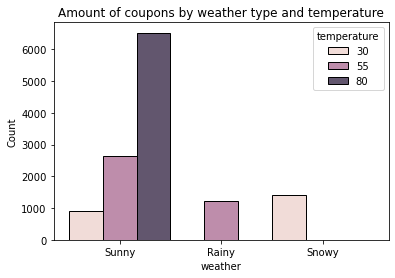

In [431]:
temp_plot = sns.histplot(data=data4, x='weather',hue='temperature',multiple="dodge").set(title='Amount of coupons by weather type and temperature')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

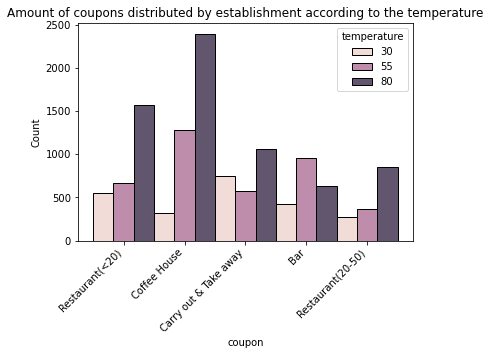

In [432]:
temp_plot = sns.histplot(data=data4, x='coupon',hue='temperature',multiple="dodge").set(title='Amount of coupons distributed by establishment according to the temperature')
plt.xticks(rotation=45, horizontalalignment='right')

###### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  



###### 1. Create a new `DataFrame` that contains just the bar coupons.

In [433]:
bar_tender=data4[data4['coupon'].str.contains('Bar')]
bar_tender.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10573,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,31,Married partner,...,4-8,4-8,>8,1-3,1,0,0,0,1,0
12022,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Single,...,<1,<1,<1,<1,1,1,0,0,1,1
6773,Work,Alone,Sunny,55,7AM,Bar,1d,Female,31,Married partner,...,<1,>8,4-8,1-3,1,1,1,0,1,0
1364,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,4-8,>8,1-3,1-3,1,1,1,0,1,0
4699,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,1-3,4-8,1-3,1,0,0,0,1,0
3296,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4-8,4-8,1-3,<1,1,0,0,0,1,0
2090,Work,Alone,Sunny,55,7AM,Bar,1d,Female,36,Divorced,...,>8,>8,>8,1-3,1,1,1,0,1,0
1532,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,36,Married partner,...,1-3,1-3,<1,<1,1,1,0,0,1,0
9886,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,36,Divorced,...,4-8,1-3,<1,<1,1,0,0,0,1,1
8830,No Urgent Place,Partner,Sunny,55,2PM,Bar,1d,Female,31,Married partner,...,<1,>8,4-8,<1,1,0,0,0,1,0


###### 2. What proportion of bar coupons were accepted?


0.41001487357461575


(array([0]), [Text(0, 0, 'Bar')])

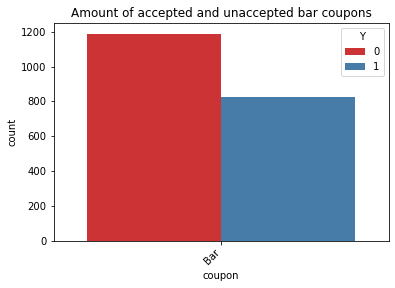

In [463]:
Used_BarCoupon=bar_tender['Y'].sum()
Total_Barcoupon=bar_tender['Y'].count()
Proportion_bar = Used_BarCoupon/Total_Barcoupon
print(Proportion_bar)
sns.countplot(data=bar_tender, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons')
plt.xticks(rotation=45, horizontalalignment='right')

###### The proportion of used bar coupons was 0.41 or 41%

###### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


###### 3.1 Examine each group going to the bar

In [435]:
bar_tender['Bar'].value_counts()

0      830
<1     570
1-3    397
4-8    150
>8      49
-       21
Name: Bar, dtype: int64

###### Make dataframes for each subset, three down 3 or fewer, three more is 4 and up

In [436]:
threedown = bar_tender[bar_tender['Bar'].isin(['0','<1','1-3'])]
threedown.count()

destination             1797
passanger               1797
weather                 1797
temperature             1797
time                    1797
coupon                  1797
expiration              1797
gender                  1797
age                     1797
maritalStatus           1797
has_children            1797
education               1797
occupation              1797
income                  1797
Bar                     1797
CoffeeHouse             1797
CarryAway               1797
RestaurantLessThan20    1797
Restaurant20To50        1797
toCoupon_GEQ5min        1797
toCoupon_GEQ15min       1797
toCoupon_GEQ25min       1797
direction_same          1797
direction_opp           1797
Y                       1797
dtype: int64

In [437]:
threemore = bar_tender[bar_tender['Bar'].isin(['4-8','>8'])]
threemore.count()

destination             199
passanger               199
weather                 199
temperature             199
time                    199
coupon                  199
expiration              199
gender                  199
age                     199
maritalStatus           199
has_children            199
education               199
occupation              199
income                  199
Bar                     199
CoffeeHouse             199
CarryAway               199
RestaurantLessThan20    199
Restaurant20To50        199
toCoupon_GEQ5min        199
toCoupon_GEQ15min       199
toCoupon_GEQ25min       199
direction_same          199
direction_opp           199
Y                       199
dtype: int64

###### 3.3 Determine acceptance rate for 3 down

0.37061769616026713


(array([0]), [Text(0, 0, 'Bar')])

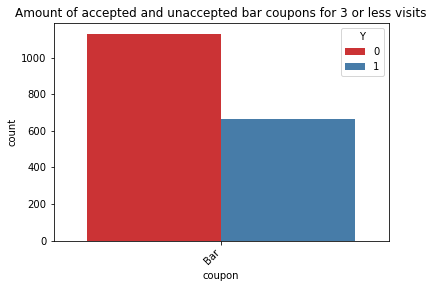

In [467]:
downCoupon=threedown['Y'].sum()
Total_downcoupon=threedown['Y'].count()
Proportion_threedown = downCoupon/Total_downcoupon
print(Proportion_threedown)
sns.countplot(data=threedown, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons for 3 or less visits')
plt.xticks(rotation=45, horizontalalignment='right')

###### The proportion using the coupon in the 3 or less group is 0.37 or 37%

###### 3.4 Determine acceptance rate for 4 or more visits to the ol watering hole

0.7688442211055276


(array([0]), [Text(0, 0, 'Bar')])

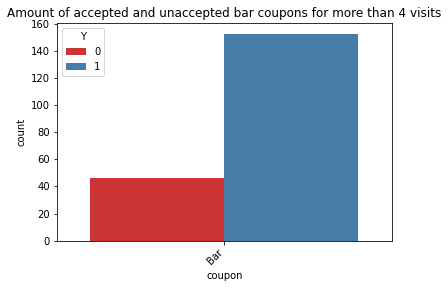

In [468]:
morecoupon=threemore['Y'].sum()
Total_morecoupon=threemore['Y'].count()
Proportion_threemore = morecoupon/Total_morecoupon
print(Proportion_threemore)
sns.countplot(data=threemore, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons for more than 4 visits')
plt.xticks(rotation=45, horizontalalignment='right')

###### The proportion using the coupon in the 4 or more group is 0.77 or 77%

Takehome message - Customers that visit the bar 4 or more times are approximately 2 times more likely to use a coupon than those going 3 times or less

###### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


###### 4.1 split dataframe to include only those going to the bar more than once a month

In [440]:
month = bar_tender[bar_tender['Bar'].isin(['1-3','4-8','>8'])]
month['age'].value_counts()

26         169
21         166
31          96
50plus      67
36          40
41          32
46          16
below21     10
Name: age, dtype: int64

###### 4.2 Clean dataframe to represent numerical values - replace 50 plus with 50 and below 21 with 20

In [441]:
month2=month.replace({"50plus":"51", "below21":"20"})
month2['age'].value_counts()

26    169
21    166
31     96
51     67
36     40
41     32
46     16
20     10
Name: age, dtype: int64

###### 4.3 Split dataframe to include only ages over 25

In [442]:
month25 = month2[month2['age'] > '25']
month25['age'].value_counts()

26    169
31     96
51     67
36     40
41     32
46     16
Name: age, dtype: int64

###### 4.4 Determine proportion of drivers over 25 that go to the bar more than once a month 

0.6952380952380952


(array([0]), [Text(0, 0, 'Bar')])

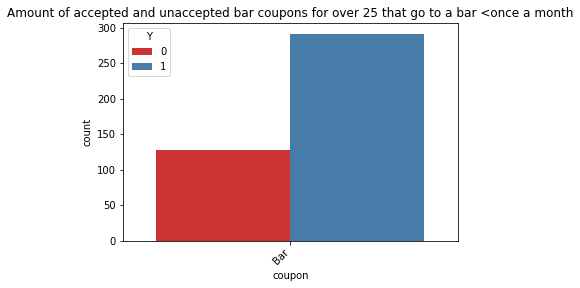

In [469]:
monthCoupon=month25['Y'].sum()
Total_monthcoupon=month25['Y'].count()
Proportion_month = monthCoupon/Total_monthcoupon
print(Proportion_month)
sns.countplot(data=month25, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons for over 25 that go to a bar <once a month')
plt.xticks(rotation=45, horizontalalignment='right')

###### 4.5 Determine proportion of drivers under 25 that go to the bar less than once a month 

0.388


(array([0]), [Text(0, 0, 'Bar')])

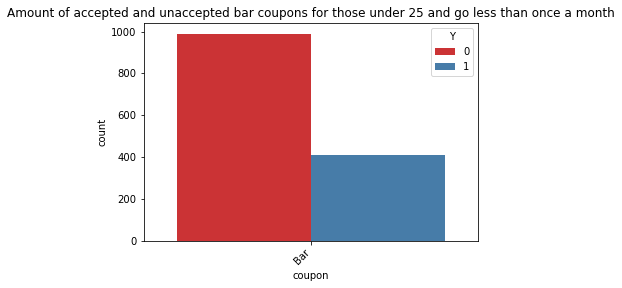

In [470]:
monthless = bar_tender[bar_tender['Bar'].isin(['0','<1'])]
monthless25 = monthless[monthless['age'] < '25']
monthlessCoupon=monthless25['Y'].sum()
Total_monthlesscoupon=monthless25['Y'].count()
Proportion_monthless = monthlessCoupon/Total_monthlesscoupon
print(Proportion_monthless)
sns.countplot(data=monthless, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons for those under 25 and go less than once a month')
plt.xticks(rotation=45, horizontalalignment='right')

###### Drivers over 25 that head to the bar more than once a month are almost twice as likely to use a coupon than others

###### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


###### 5.1 Create dataframe that fits the criteria

In [445]:
month25['passanger'].value_counts()

Alone        241
Friend(s)     84
Partner       52
Kid(s)        43
Name: passanger, dtype: int64

In [446]:
m25_nokids = month25[~month25['passanger'].isin(['Kid(s)', 'Alone'])]
m25_nokids['passanger'].value_counts()

Friend(s)    84
Partner      52
Name: passanger, dtype: int64

In [447]:
m25_nokids['occupation'].value_counts()

Unemployed                                   19
Sales & Related                              19
Computer & Mathematical                      17
Office & Administrative Support              13
Management                                    9
Business & Financial                          7
Education&Training&Library                    6
Transportation & Material Moving              6
Healthcare Practitioners & Technical          5
Protective Service                            5
Arts Design Entertainment Sports & Media      5
Construction & Extraction                     4
Legal                                         4
Healthcare Support                            3
Food Preparation & Serving Related            3
Architecture & Engineering                    2
Production Occupations                        2
Installation Maintenance & Repair             2
Personal Care & Service                       1
Building & Grounds Cleaning & Maintenance     1
Retired                                 

In [448]:
m25_nokids_nofinjobs=m25_nokids[~m25_nokids['occupation'].isin(['farming','fishing','forestry'])]
m25_nokids_nofinjobs['occupation'].value_counts()

Unemployed                                   19
Sales & Related                              19
Computer & Mathematical                      17
Office & Administrative Support              13
Management                                    9
Business & Financial                          7
Education&Training&Library                    6
Transportation & Material Moving              6
Healthcare Practitioners & Technical          5
Protective Service                            5
Arts Design Entertainment Sports & Media      5
Construction & Extraction                     4
Legal                                         4
Healthcare Support                            3
Food Preparation & Serving Related            3
Architecture & Engineering                    2
Production Occupations                        2
Installation Maintenance & Repair             2
Personal Care & Service                       1
Building & Grounds Cleaning & Maintenance     1
Retired                                 

###### There were no drivers in the farming, fishing, or forestry industry in the bar coupon subset

###### 5.2 Determine the proportion of people with no kids as passangers going to the bar once a month and using a coupon

0.6952380952380952


[Text(0.5, 1.0, 'Amount of accepted and unaccepted bar coupons for bar patrons with passengers that are not kids')]

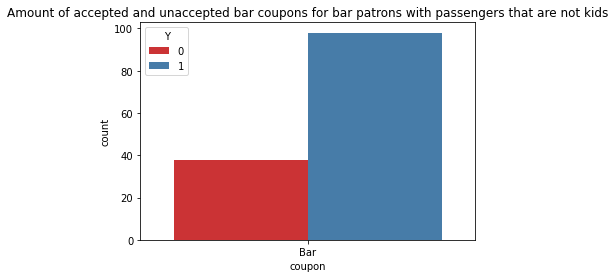

In [473]:
m25_nokids_nofinjobscoupon=m25_nokids_nofinjobs['Y'].sum()
Total_nokidcoupon=m25_nokids_nofinjobs['Y'].count()
Proportion_nokids = m25_nokids_nofinjobscoupon/Total_nokidcoupon
print(Proportion_month)
sns.countplot(data=m25_nokids_nofinjobs, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons for bar patrons with passengers that are not kids')


###### Drivers going to the bar more than once a month without kids in the car us a coupon about 70% of the time. This is similar to those over 25 going once a month and almost twice the overall acceptance rate of bar coupons.

###### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



###### Proportion of those going to bars more than once a month, had passengers that were not a kid, and were not widowed is us coupons 72% of the time

0.7205882352941176


[Text(0.5, 1.0, 'Amount of accepted and unaccepted bar coupons for non-widows with passengers that are not kids')]

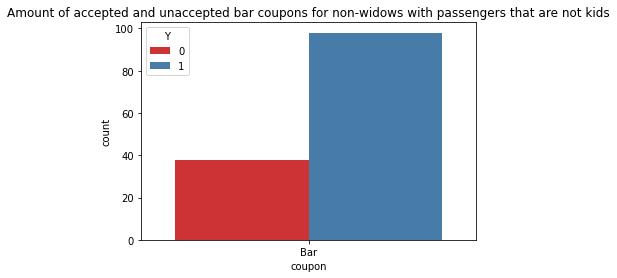

In [475]:
m25_nokids_widow=m25_nokids[~m25_nokids['maritalStatus'].isin(['widowed'])]
m25_nokids_widowCoupon=m25_nokids_widow['Y'].sum()
Total_m25_nokids_widowcoupon=m25_nokids_widow['Y'].count()
Proportion_m25_nokids_widow = m25_nokids_widowCoupon/Total_m25_nokids_widowcoupon
print(Proportion_m25_nokids_widow)
sns.countplot(data=m25_nokids, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons for non-widows with passengers that are not kids')

###### Proportion of those going to bars more than once a month and are under the age of 30 us a coupon 72% of the time

0.7217391304347827


[Text(0.5, 1.0, 'Amount of accepted and unaccepted bar coupons for those under the age of 30')]

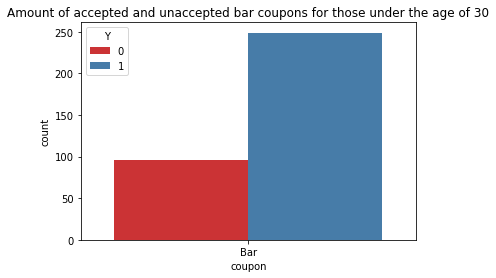

In [476]:
month30 = month2[month2['age'] < '30']
month30Coupon=month30['Y'].sum()
Total_month30coupon=month30['Y'].count()
Proportion_month30 = month30Coupon/Total_month30coupon
print(Proportion_month30)
sns.countplot(data=month30, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons for those under the age of 30')

###### Proportion go to cheap restaurants more than 4 times a month and income is less than 50K use a coupon 77% of the time

In [452]:
month2['RestaurantLessThan20'].value_counts()

1-3    244
4-8    235
<1      55
>8      55
0        7
Name: RestaurantLessThan20, dtype: int64

In [453]:
cheap_eats=month2[month2['RestaurantLessThan20'].isin(['4-8','>8'])]
cheap_eats['RestaurantLessThan20'].value_counts()

4-8    235
>8      55
Name: RestaurantLessThan20, dtype: int64

In [454]:
cheap_eats['income'].value_counts()

$12500 - $24999     45
$100000 or More     43
$62500 - $74999     39
$37500 - $49999     36
$50000 - $62499     32
$25000 - $37499     27
$75000 - $87499     26
Less than $12500    22
$87500 - $99999     20
Name: income, dtype: int64

In [455]:
cheap_eats2 = cheap_eats.replace({"$100000 or More":">$10000", "Less than $12500":"$12500<"})
cheap_eats2['income'].value_counts()

$12500 - $24999    45
>$10000            43
$62500 - $74999    39
$37500 - $49999    36
$50000 - $62499    32
$25000 - $37499    27
$75000 - $87499    26
$12500<            22
$87500 - $99999    20
Name: income, dtype: int64

In [456]:
cheap_eats50K=cheap_eats2[cheap_eats2['income'] < '$49999']
cheap_eats50K['income'].value_counts()

$12500 - $24999    45
$37500 - $49999    36
$25000 - $37499    27
$12500<            22
Name: income, dtype: int64

0.7692307692307693


[Text(0.5, 1.0, 'Amount of accepted and unaccepted bar coupons for patrons that enjoy cheap eats and make <$50K')]

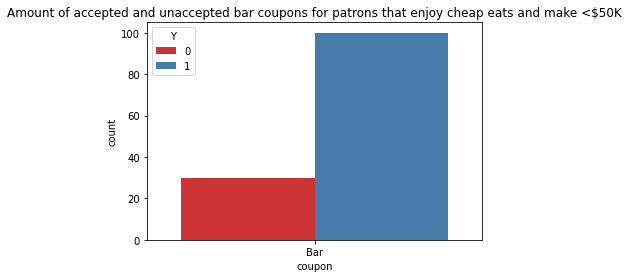

In [478]:
Cheapeatscoupon=cheap_eats50K['Y'].sum()
Total_cheapeatscoupon=cheap_eats50K['Y'].count()
Proportion_cheapeats = Cheapeatscoupon/Total_cheapeatscoupon
print(Proportion_cheapeats)
sns.countplot(data=cheap_eats50K, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted bar coupons for patrons that enjoy cheap eats and make <$50K')

###### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Approx. 40% of total allocated bar coupons are used. This percentage doubles when focusing on people who go more than once a month. The increased percentage appears to be independant of covariants like age, passenger or occupation.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

###### From the previous plot, the Coffee House category had an even split of used and unused coupons. Let's look to see if we can identify factors influencing the  use the coupon

In [515]:
barista=data4[data4['coupon'].str.contains('Coffee House')]
barista.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,-,4-8,1-3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,-,4-8,1-3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,-,4-8,1-3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,0,-,4-8,1-3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,0,-,4-8,1-3,1,0,0,0,1,0


In [559]:
barista['time'].value_counts()

6PM     1093
7AM      913
10AM     899
2PM      794
10PM     297
Name: time, dtype: int64

In [542]:
barista2=barista.replace({"6PM":"18", "7AM":"7","10AM":"10","2PM":"14","10PM":"22"})
barista2.sort_values(by='time',inplace=True, ascending=False)
barista2.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12681,Work,Alone,Snowy,30,7,Coffee House,1d,Male,26,Single,...,0,1-3,4-8,1-3,1,0,0,1,0,0
6323,Work,Alone,Sunny,55,7,Coffee House,1d,Female,31,Married partner,...,4-8,4-8,1-3,0,1,1,0,0,1,1
5343,Work,Alone,Sunny,80,7,Coffee House,2h,Female,26,Unmarried partner,...,<1,1-3,1-3,<1,1,1,0,1,0,1
5346,Work,Alone,Sunny,55,7,Coffee House,1d,Female,26,Unmarried partner,...,<1,1-3,1-3,<1,1,1,0,0,1,1
2379,Work,Alone,Sunny,55,7,Coffee House,2h,Female,21,Single,...,<1,>8,1-3,1-3,1,1,0,0,1,0


0.49924924924924924


(array([0]), [Text(0, 0, 'Coffee House')])

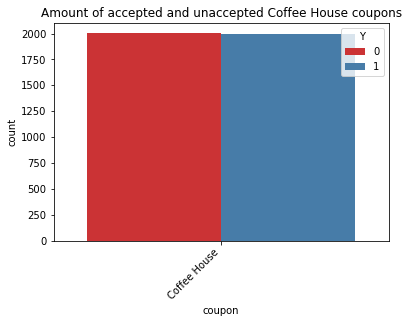

In [479]:
Used_CCoupon=barista['Y'].sum()
Total_Ccoupon=barista['Y'].count()
Proportion_Coffee = Used_CCoupon/Total_Ccoupon
print(Proportion_Coffee)
sns.countplot(data=barista, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted Coffee House coupons')
plt.xticks(rotation=45, horizontalalignment='right')

In [553]:
fig = px.violin(barista, x='weather', y='time')
fig.show()

###### plotting time of day by weather highlights some interesting trends. On sunny days, coupons were distributed even throught the day before 10PM. On rainy days, coupons were mostly at 10AM or 10 PM and on snowy days, there were limited coupons between 10 AM and 6PM. 

Next let's replot looking at use, Y=1 is accepted and Y=0 is not accepted

In [555]:
fig = px.violin(barista, y="time", x="weather", color="Y", box=True,
          hover_data=barista.columns)
fig.show()

###### In this plot, it appears that more coupons are accepted in the mornings on rainy days than the evening with the converse being true for snowy days.  Sunny days had more accepted between 10 AM and 2PM then at 7AM or 6 PM.

0.6774193548387096


[Text(0.5, 1.0, 'Amount of accepted and unaccepted Coffee House coupons on rainy mornings')]

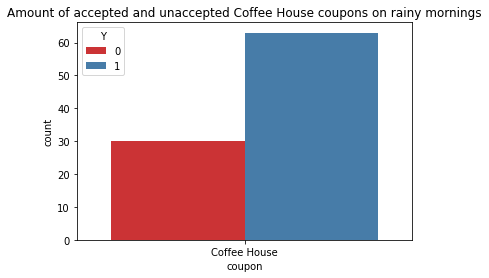

In [573]:
rainy= barista[barista['weather'].isin(['Rainy'])]                
rainy_morning = rainy[rainy['time'] == '10AM']
rainymorningcoupon=rainy_morning['Y'].sum()
Total_rainycoupon=rainy_morning['Y'].count()
Proportion_rainy = rainymorningcoupon/Total_rainycoupon
print(Proportion_rainy)
sns.countplot(data=rainy_morning, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted Coffee House coupons on rainy mornings')

0.37037037037037035


[Text(0.5, 1.0, 'Amount of accepted and unaccepted Coffee House coupons on rainy eve')]

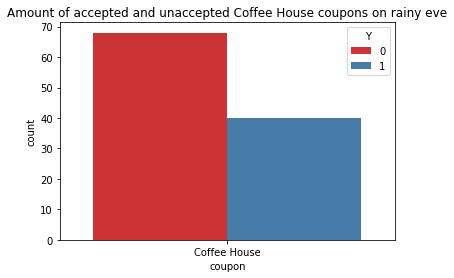

In [574]:
rainy= barista[barista['weather'].isin(['Rainy'])]                
rainy_eve = rainy[rainy['time'] == '10PM']
rainyevecoupon=rainy_eve['Y'].sum()
Total_rainyevecoupon=rainy_eve['Y'].count()
Proportion_rainyeve = rainyevecoupon/Total_rainyevecoupon
print(Proportion_rainyeve)
sns.countplot(data=rainy_eve, x='coupon', hue='Y', palette='Set1').set(title='Amount of accepted and unaccepted Coffee House coupons on rainy eve')

###### On rainy mornings, approximately 68% of Coffee House coupons were accepted while only 37% were accepted on rainy evenings. A reccomendation would be to focus on sending the CoffeeHouse coupons on rainy mornings rather than at night.

Furthur work would be to do similar anaysis for sunny and snowy days to determine the optimal times for pushing out coupons.